In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
#import helper

#lossFunction = nn.MSELoss()
#output is the output
#target is the wanted value??
#loss = lossFunction(output, target)

#zero before backprop?
#net.zero_grad()

#STOCHASTIC GRADIENT DESCENT
#for f in net.parameters():
#f.data.sub_(f.gad.data + learning_rate)

In [2]:
res = 128                   #images of 128 for the hexagonal datasets currently
input_dim = (res, res) 
input_size = res*res
output_size = 10            #what defines classes lol

def load_train_dataset():
    data_path = 'C:/Users/jerry/Documents/GitHub/IsingML/hexagonal-dataset/'
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.Compose([
            transforms.Resize(input_dim), #is this necessary?
            transforms.ToTensor()
            ])
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=1,
        num_workers=0,
        shuffle=True
    )
    return train_loader

def load_test_dataset():
    data_path = 'C:/Users/jerry/Documents/GitHub/IsingML/hexagonal-dataset-test/'
    test_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.Compose([
            transforms.Resize(input_dim),
            transforms.ToTensor()
            ])
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=64,
        num_workers=0,
        shuffle=True
    )
    return test_loader

In [3]:
'''
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 3
data_directory = "C:\\Users\\jerry\\Documents\\GitHub\\IsingML\\triangular-dataset"
#dataset = datasets.ImageFolder('triangular-dataset', transform=transform)
dataset = datasets.ImageFolder(data_directory, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=3, shuffle=True)

images, labels = next(iter(dataloader))
matplotlib.pyplot.imshow(images[0])
#helper.imshow(images[0], normalize=False)
'''


'\ntransform = transforms.Compose([transforms.ToTensor()])\nbatch_size = 3\ndata_directory = "C:\\Users\\jerry\\Documents\\GitHub\\IsingML\\triangular-dataset"\n#dataset = datasets.ImageFolder(\'triangular-dataset\', transform=transform)\ndataset = datasets.ImageFolder(data_directory, transform=transform)\ndataloader = torch.utils.data.DataLoader(dataset, batch_size=3, shuffle=True)\n\nimages, labels = next(iter(dataloader))\nmatplotlib.pyplot.imshow(images[0])\n#helper.imshow(images[0], normalize=False)\n'

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
import torchvision
import matplotlib.pyplot as plt
import numpy
from torch.utils.data import Dataset, DataLoader


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

#got two graphics card, need to check which one i'm using?

In [5]:
class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image)
        return tensor_image

In [6]:
'''
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
'''

"\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# functions to show an image\n\n\ndef imshow(img):\n    #img = img / 2 + 0.5     # unnormalize\n    npimg = img.numpy()\n    plt.imshow(np.transpose(npimg, (1, 2, 0)))\n    plt.show()\n\n\n# get some random training images\ndataiter = iter(trainloader)\nimages, labels = dataiter.next()\n\n# show images\nimshow(torchvision.utils.make_grid(images))\n# print labels\nprint(' '.join('%5s' % classes[labels[j]] for j in range(4)))\n"

In [7]:
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.conv3 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.conv4 = nn.Conv2d(n_feature, n_feature, kernel_size=4)
        self.fc1 = nn.Linear(n_feature*12*12, 12)
        self.fc2 = nn.Linear(12, 10)
        
    def forward(self, x, verbose=True):
        # F here is the library of functionals
        #x = x.view(-1, self.n_feature*50*50)
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        #x = self.conv4(x)
        #x = F.relu(x)
        #x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*12*12)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [8]:
accuracy_list = []

def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(load_train_dataset()):
        # send to device
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(load_train_dataset().dataset),
                100. * batch_idx / len(load_train_dataset()), loss.item()))
            
def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in load_test_dataset():
        # send to device
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(load_test_dataset().dataset)
    accuracy = 100. * correct / len(load_test_dataset().dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(load_test_dataset().dataset),
        accuracy))

In [9]:
# Training settings 
n_features = 10 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 5):
    train(epoch, model_cnn)
    test(model_cnn)



Number of parameters: 24812
Train Epoch: 0 [0/39 (0%)]	Loss: 2.289346

Test set: Average loss: 2.3132, Accuracy: 1/10 (10%)

Train Epoch: 1 [0/39 (0%)]	Loss: 2.173828

Test set: Average loss: 2.3121, Accuracy: 1/10 (10%)

Train Epoch: 2 [0/39 (0%)]	Loss: 2.333282

Test set: Average loss: 2.3110, Accuracy: 1/10 (10%)

Train Epoch: 3 [0/39 (0%)]	Loss: 2.243536

Test set: Average loss: 2.3103, Accuracy: 1/10 (10%)

Train Epoch: 4 [0/39 (0%)]	Loss: 2.208246

Test set: Average loss: 2.3094, Accuracy: 1/10 (10%)



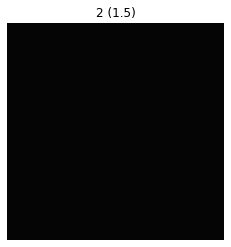

In [10]:
categories = [16, 8, 4, 2, 1.5, 1, 0.5, 0.25, 0.1, 0.001] #10 categories 

def show_predictions(rows=10, columns = 10):
    y_pred = []
    y_true = []
    x = []
    maxtoshow = rows * columns
    
    i = 0
    for data, target in load_test_dataset():
        if i>=maxtoshow:
            break
        data, target = data.to(device), target.to(device)
        output = model_cnn(data)
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        x.append(data.view(-1,3,32,32)[0].permute(1, 2, 0).cpu())
        y_pred.append(pred)
        y_true.append(target)
        i = i + 1
        

    ii = 0
    plt.figure(figsize=(32, 32))
    for i in range(len(x)):
        if ii>=maxtoshow:
            break
        plt.subplot(rows, columns, ii+1)
        plt.axis('off')
        plt.imshow(x[i].numpy())
        plt.title("%s (%s)" % (categories[y_pred[i][0]], categories[y_true[i][0]]))
        ii = ii + 1
    plt.tight_layout()

show_predictions()